In [1]:
# William Nourse
# Feb 18 2021

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Spikes')

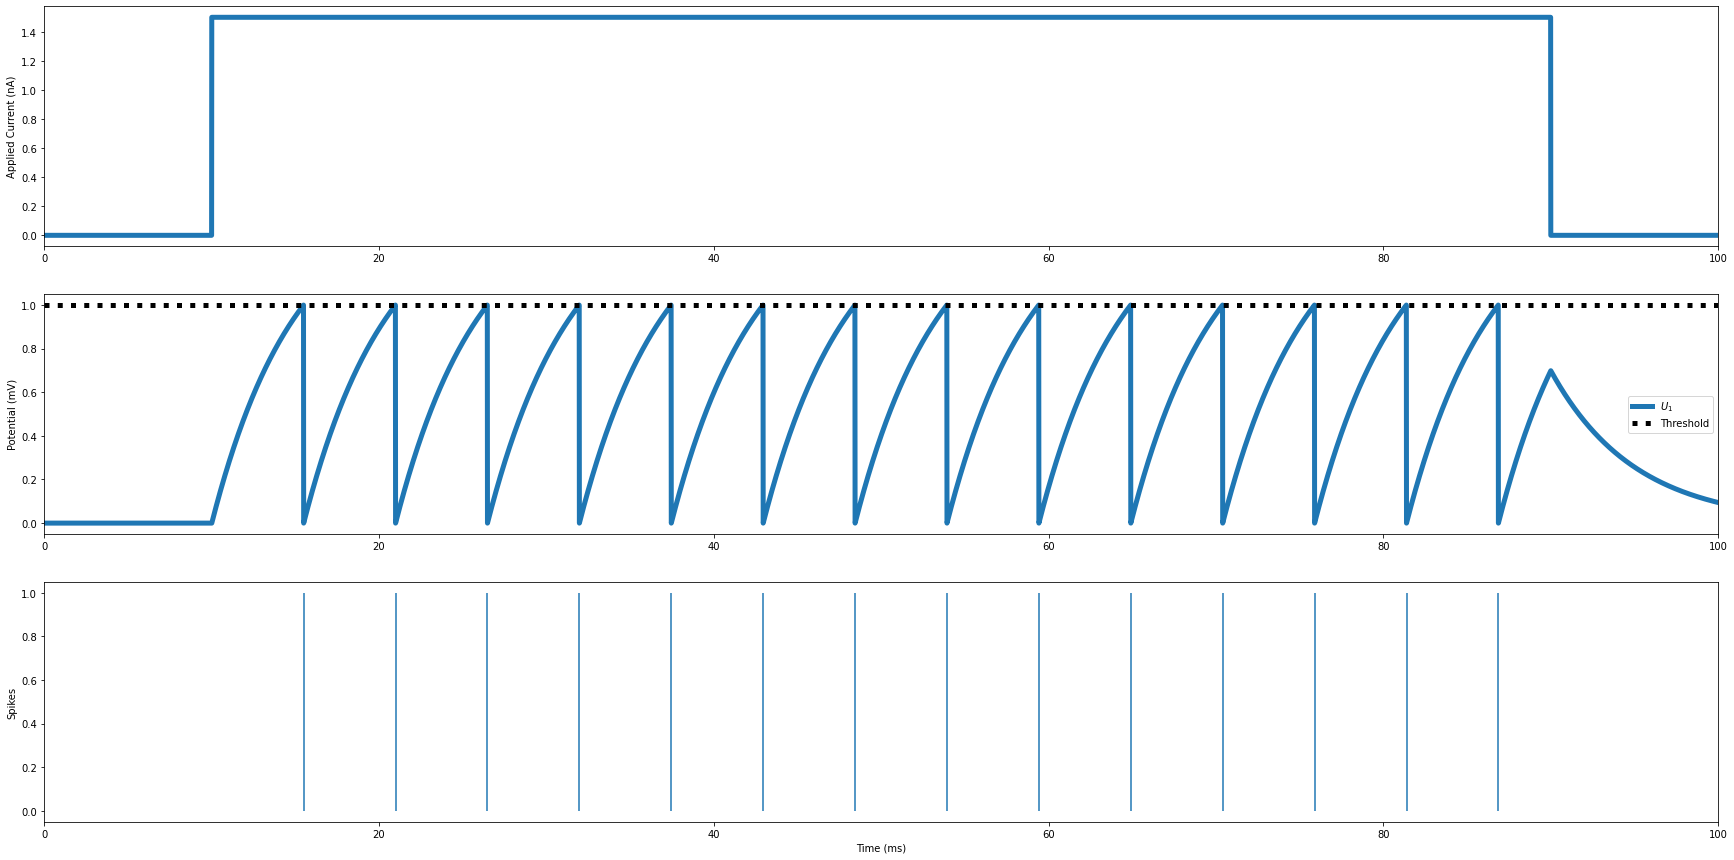

In [2]:
Cm = 5
Gm = 1
Iapp = 1.5
theta = 1
dt = 0.01
tMax = 100
tStart = 10
tStop = 90
t = np.arange(0,tMax,dt)
numSteps = np.size(t)

U1 = np.zeros(numSteps)
U1spikeTimes = []

I = np.zeros(numSteps)
for i in range(numSteps):
    if (t[i] > tStart) and (t[i]<tStop):
        I[i] = Iapp

for i in range(1,numSteps):
    U1[i] = U1[i-1] + dt/Cm*(I[i-1]-Gm*U1[i-1])
    if U1[i] > theta:
        U1[i] = 0
        U1spikeTimes.append(t[i])
plt.figure(figsize=(30,15))
plt.subplot(3,1,1)
plt.plot(t,I,lw=5)
plt.ylabel('Applied Current (nA)')
plt.xlim([0,tMax])

plt.subplot(3,1,2)
plt.plot(t,U1,label='$U_1$',lw=5)
plt.axhline(y=theta,color='k',lw=5,linestyle=':',label='Threshold')
plt.ylabel('Potential (mV)')
plt.xlim([0,tMax])
plt.legend()

plt.subplot(3,1,3)
plt.vlines(U1spikeTimes,0,1)
plt.xlim([0,tMax])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')

Text(0, 0.5, 'Frequency (Hz)')

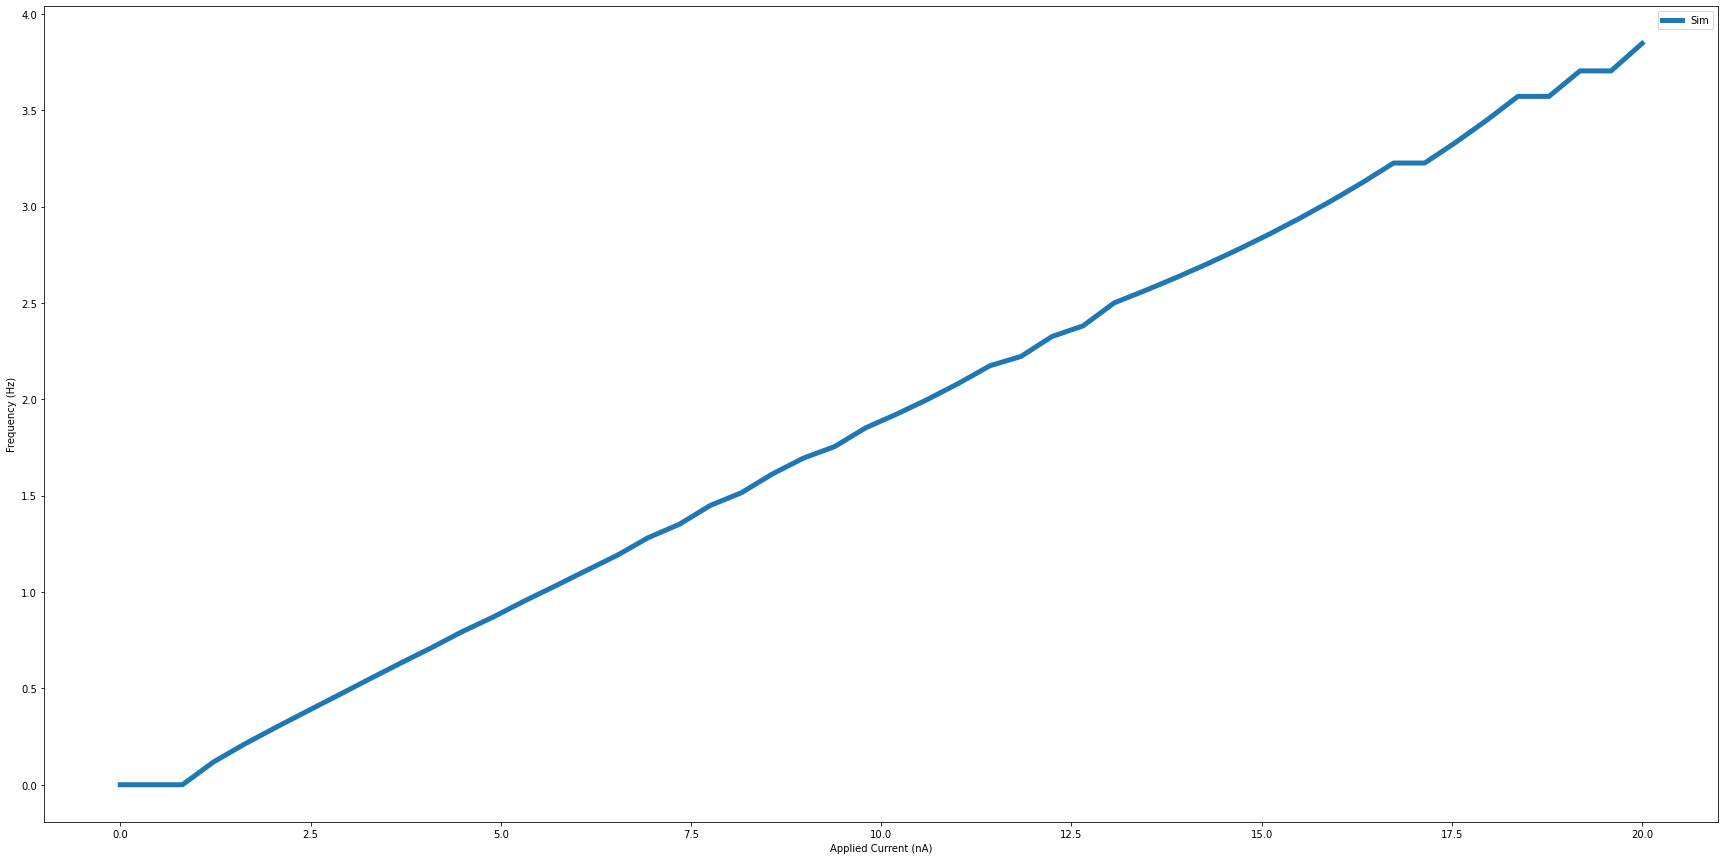

In [3]:
# Spiking Frequency

# Simulated
R = 20
Is = np.linspace(0,R)
U1 = np.zeros(numSteps)
periods = np.zeros(np.size(Is))

for j in range(np.size(Is)):
    i = 1
    while (U1[i-1] <= theta) and (t[i-1]<tMax-1):
        U1[i] = U1[i-1] + dt/Cm*(Is[j]-Gm*U1[i-1])
        i+=1
    if U1[i-1]>=theta:
        periods[j] = t[i-1]

freqs = np.empty(np.size(periods))
for i in range(np.size(periods)):
    if periods[i] > 0:
        freqs[i] = 1/periods[i]
        
plt.figure(figsize=(30,15))
plt.plot(Is,freqs,label='Sim',lw=5)
plt.legend()
plt.xlabel('Applied Current (nA)')
plt.ylabel('Frequency (Hz)')

<ipython-input-4-2ff491e8d50a>:6: RuntimeWarning: divide by zero encountered in true_divide
  fCalc = -1/(tau*np.log(1-theta/Ustr))
<ipython-input-4-2ff491e8d50a>:6: RuntimeWarning: invalid value encountered in log
  fCalc = -1/(tau*np.log(1-theta/Ustr))


Text(0, 0.5, 'Frequency (Hz)')

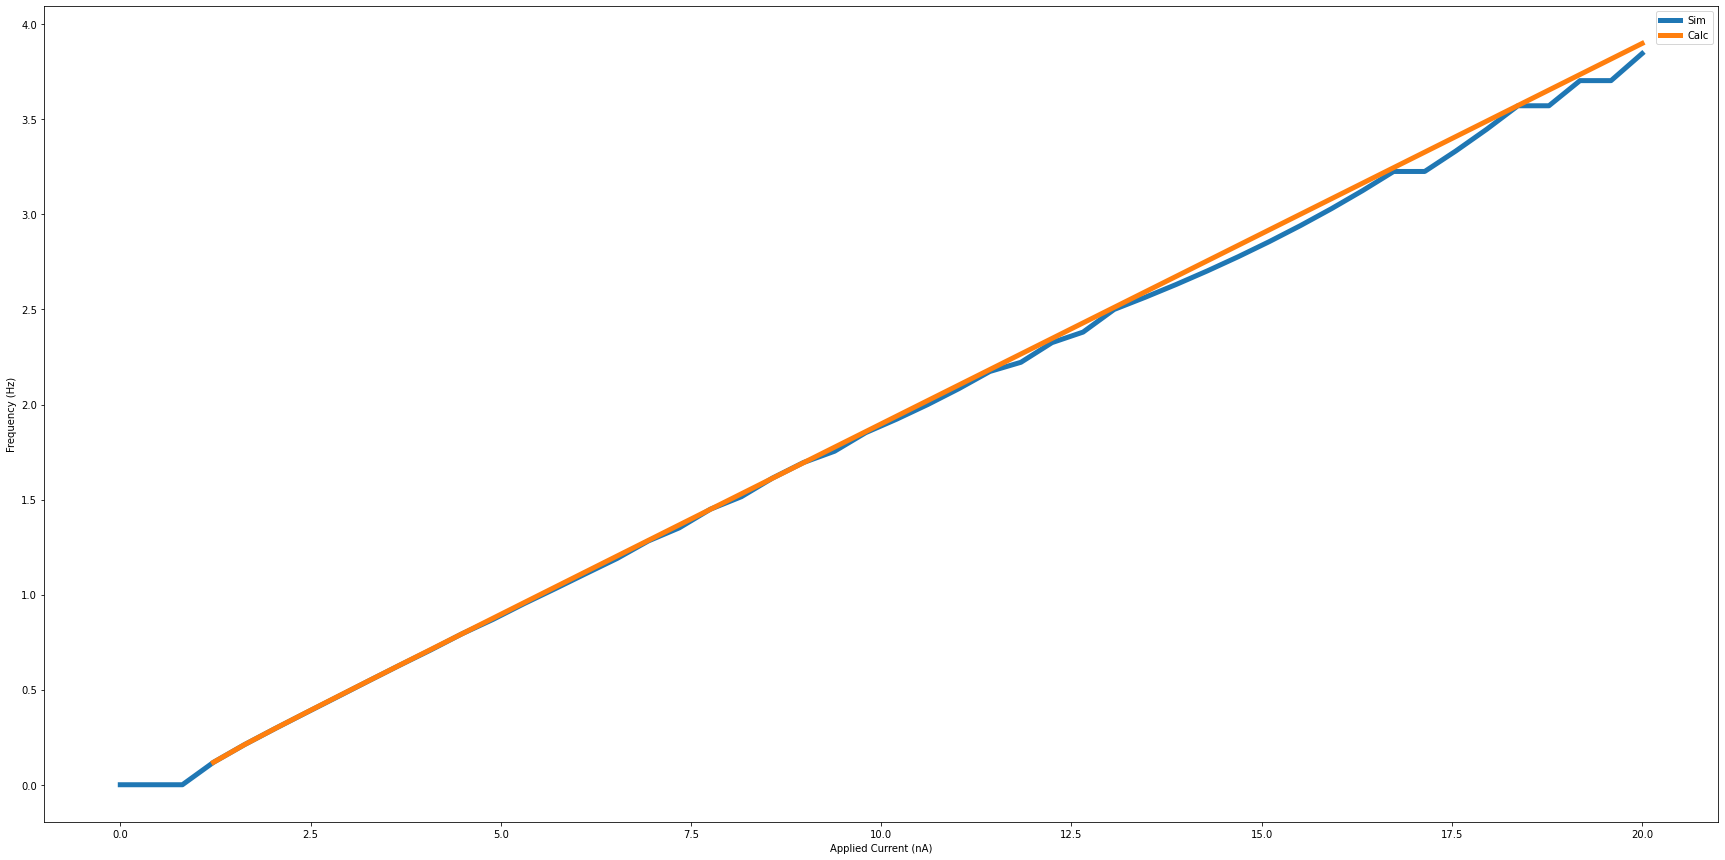

In [4]:
# Spiking Frequency

# Calculated
Ustr = Is/Gm
tau = Cm/Gm
fCalc = -1/(tau*np.log(1-theta/Ustr))
        
plt.figure(figsize=(30,15))
plt.plot(Is,freqs,label='Sim',lw=5)
plt.plot(Is,fCalc,label='Calc',lw=5)
plt.legend()
plt.xlabel('Applied Current (nA)')
plt.ylabel('Frequency (Hz)')

Text(0, 0.5, 'Frequency (Hz)')

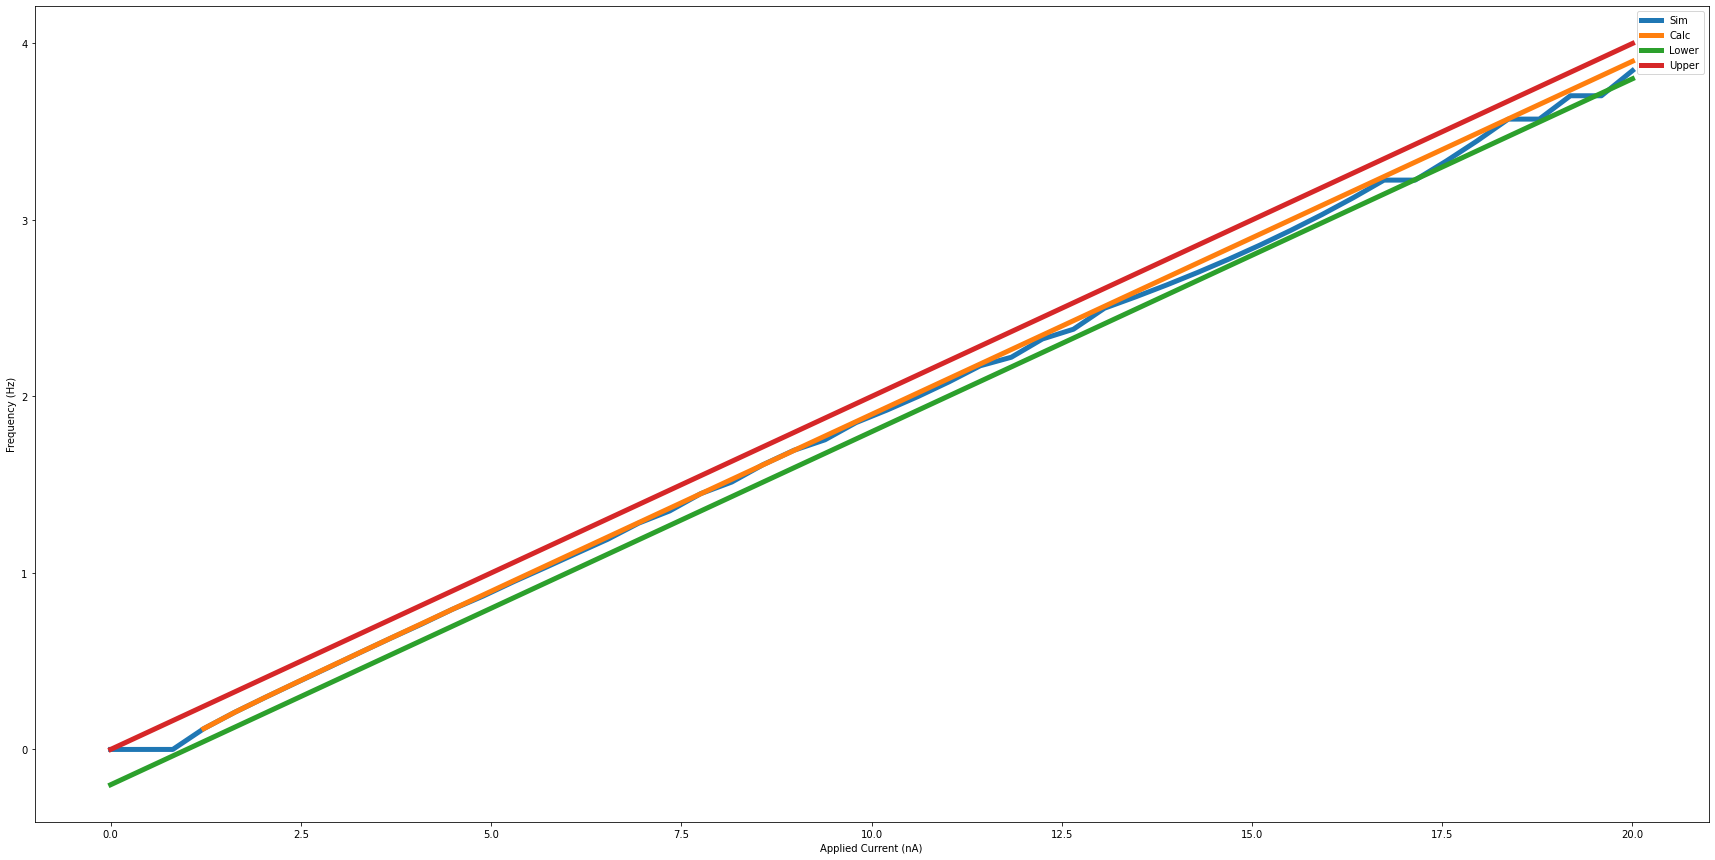

In [5]:
# Spiking Frequency

# Bounds

fLow = Ustr/(tau*theta)-1/tau
fUp = Ustr/(tau*theta)
        
plt.figure(figsize=(30,15))
plt.plot(Is,freqs,label='Sim',lw=5)
plt.plot(Is,fCalc,label='Calc',lw=5)
plt.plot(Is,fLow,label='Lower',lw=5)
plt.plot(Is,fUp,label='Upper',lw=5)
plt.legend()
plt.xlabel('Applied Current (nA)')
plt.ylabel('Frequency (Hz)')

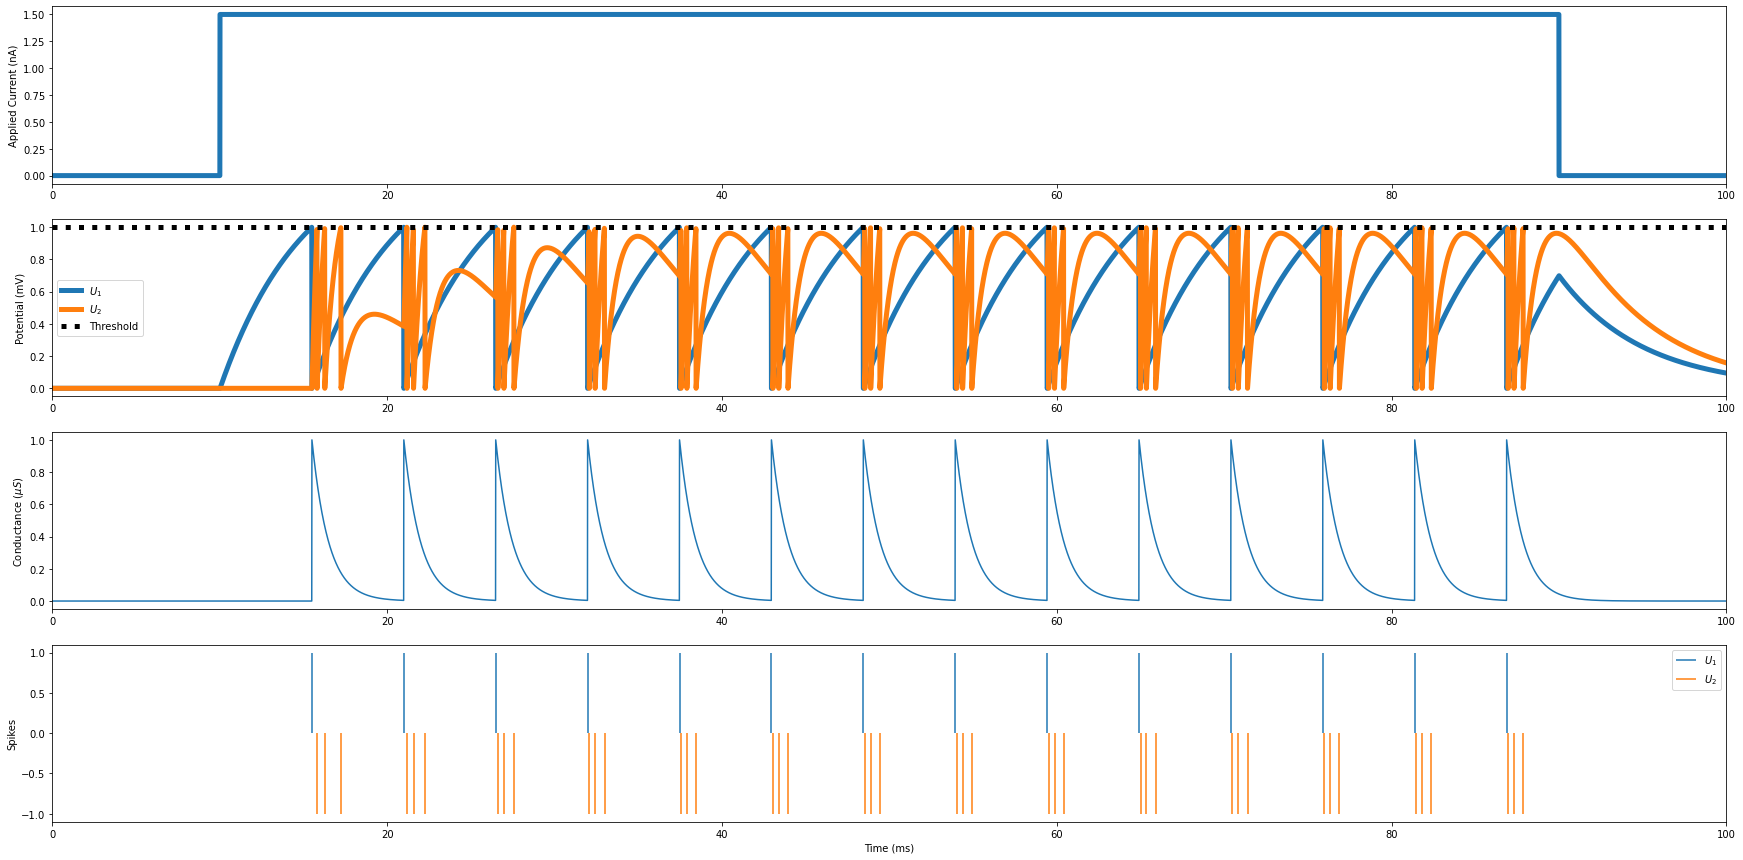

In [6]:
Cm = 5
Gm = 1
Iapp = 1.5
theta = 1
dt = 0.01
tMax = 100
tStart = 10
tStop = 90
t = np.arange(0,tMax,dt)
numSteps = np.size(t)

U1 = np.zeros(numSteps)
U2 = np.zeros(numSteps)
g = np.zeros(numSteps)
tauS = 1
gMax = 1
delE = 20
U1spikeTimes = []
U2spikeTimes = []

I = np.zeros(numSteps)
for i in range(numSteps):
    if (t[i] > tStart) and (t[i]<tStop):
        I[i] = Iapp

for i in range(1,numSteps):
    U1[i] = U1[i-1] + dt/Cm*(I[i-1]-Gm*U1[i-1])
    U2[i] = U2[i-1] + dt/Cm*(g[i-1]*(delE-U2[i-1])-Gm*U2[i-1])
    g[i] = g[i-1] + dt/tauS*(-g[i-1])
    if U1[i] > theta:
        U1[i] = 0
        U1spikeTimes.append(t[i])
        g[i] = gMax
    if U2[i] > theta:
        U2[i] = 0
        U2spikeTimes.append(t[i])
        
plt.figure(figsize=(30,15))
plt.subplot(4,1,1)
plt.plot(t,I,lw=5)
plt.ylabel('Applied Current (nA)')
plt.xlim([0,tMax])

plt.subplot(4,1,2)
plt.plot(t,U1,label='$U_1$',lw=5)
plt.plot(t,U2,label='$U_2$',lw=5)
plt.axhline(y=theta,color='k',lw=5,linestyle=':',label='Threshold')
plt.ylabel('Potential (mV)')
plt.xlim([0,tMax])
plt.legend()

plt.subplot(4,1,3)
plt.plot(t,g)
plt.ylabel('Conductance ($\mu S$)')
plt.xlim([0,tMax])

plt.subplot(4,1,4)
plt.vlines(U1spikeTimes,0,1,label='$U_1$')
plt.vlines(U2spikeTimes,-1,0,label='$U_2$',color='C1')
plt.xlim([0,tMax])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.legend()